# Classifier

Classifiers used to classify a song genre given its lyrics

## Loading and Processing Dataset

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

filename = '../data/dataset.csv'

df = pd.read_csv(filename, header=None, names=["artist", "song", "genre", "tokens"])

def to_list(x):
    return x[1:-1].split(',')

df['tokens'] = df['tokens'].apply(to_list)

In [5]:
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer

data = df.values

def unison_shuffled_copies(a, b):
    assert a.shape[0] == b.shape[0]
    p = np.random.permutation(a.shape[0])
    return a[p], b[p]

def dummy_fun(x):
    return x

tfidf = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy_fun,
    preprocessor=dummy_fun,
    token_pattern=None)  

X = tfidf.fit_transform(data[:,3])
Y = data[:, 2]

X, Y = unison_shuffled_copies(X, Y)

X_train = X[:4800]
X_valid = X[4800:5500]
X_test = X[5500:]

Y_train = Y[:4800]
Y_valid = Y[4800:5500]
Y_test = Y[5500:]

## Naive Bayes

In [6]:
from sklearn.naive_bayes import MultinomialNB

alpha_params = [0, 0.2, 0.6, 1.0, 2.0, 5.0, 10.0]

best_alpha, best_score = alpha_params[0], 0
scores = []
for alpha in alpha_params:
    nb_model = MultinomialNB(alpha=alpha).fit(X_train, Y_train)
    
    predicted = nb_model.predict(X_valid)
    score = accuracy_score(predicted, Y_valid)
    if score > best_score: 
        best_score = score
        best_alpha = alpha
    scores.append(score)
    print(f"Alpha: {alpha}, Validation Accuracy: {score}")

/Users/IzKevin/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0, Validation Accuracy: 0.6371428571428571
Alpha: 0.2, Validation Accuracy: 0.5928571428571429
Alpha: 0.6, Validation Accuracy: 0.57
Alpha: 1.0, Validation Accuracy: 0.56
Alpha: 2.0, Validation Accuracy: 0.5471428571428572
Alpha: 5.0, Validation Accuracy: 0.5214285714285715
Alpha: 10.0, Validation Accuracy: 0.48142857142857143


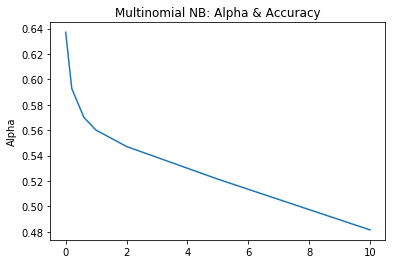

Naive Bayes Test Accuracy: 0.6611039794608472


/Users/IzKevin/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [7]:
plt.plot(alpha_params, scores)
plt.ylabel('Accuracy')
plt.title('Multinomial NB: Alpha & Accuracy')
plt.ylabel('Alpha')
# plt.savefig('nb.png')
plt.show()

nb_model = MultinomialNB(alpha=best_alpha).fit(X_train, Y_train)
predicted = nb_model.predict(X_test)
score = accuracy_score(predicted, Y_test)
print(f"Naive Bayes Test Accuracy: {score}")

## Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression

c_params = [0.1, 0.2, 0.4, 0.7, 1.0, 2.0, 3.5, 5.0, 10.0, 20.0]

best_c, best_score = c_params[0], 0
scores = []
for c in c_params:
    lr_model = LogisticRegression(C = c).fit(X_train, Y_train)
    
    predicted = lr_model.predict(X_valid)
    score = accuracy_score(predicted, Y_valid)
    if score > best_score: 
        best_score = score
        best_c = c
    scores.append(score)
    print(f"C: {c}, Validation Accuracy: {score}")


C: 0.1, Validation Accuracy: 0.5785714285714286
C: 0.2, Validation Accuracy: 0.6214285714285714
C: 0.4, Validation Accuracy: 0.6628571428571428
C: 0.7, Validation Accuracy: 0.6728571428571428
C: 1.0, Validation Accuracy: 0.6871428571428572
C: 2.0, Validation Accuracy: 0.7028571428571428
C: 3.5, Validation Accuracy: 0.71
C: 5.0, Validation Accuracy: 0.7085714285714285
C: 10.0, Validation Accuracy: 0.6942857142857143
C: 20.0, Validation Accuracy: 0.69


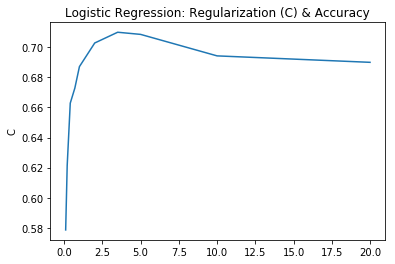

Logistic Regression Test Accuracy: 0.7073170731707317


In [9]:
plt.plot(c_params, scores)
plt.ylabel('Accuracy')
plt.title('Logistic Regression: Regularization (C) & Accuracy')
plt.ylabel('C')
plt.savefig('lr.png')
plt.show()

nb_model = LogisticRegression(C=best_c).fit(X_train, Y_train)
predicted = nb_model.predict(X_test)
score = accuracy_score(predicted, Y_test)
print(f"Logistic Regression Test Accuracy: {score}")

## Support Vector Machine

In [16]:
from sklearn.svm import SVC

c_params = [0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 5.0, 10.0]

best_c, best_score = c_params[0], 0
scores = []
for c in c_params:
    svc = SVC(kernel='linear', C=c).fit(X_train, Y_train)
    
    predicted = svc.predict(X_valid)
    score = accuracy_score(predicted, Y_valid)
    if score > best_score: 
        best_score = score
        best_c = c
    scores.append(score)
    print(f"C: {c}, Validation Accuracy: {score}")

C: 0.1, Validation Accuracy: 0.58
C: 0.5, Validation Accuracy: 0.68
C: 1.0, Validation Accuracy: 0.6914285714285714
C: 1.5, Validation Accuracy: 0.6957142857142857
C: 2.0, Validation Accuracy: 0.6957142857142857
C: 2.5, Validation Accuracy: 0.6885714285714286
C: 5.0, Validation Accuracy: 0.6885714285714286
C: 10.0, Validation Accuracy: 0.6885714285714286


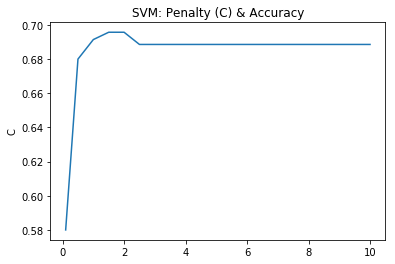

SVM Test Accuracy: 0.6944801026957638


In [17]:
plt.plot(c_params, scores)
plt.ylabel('Accuracy')
plt.title('SVM: Penalty (C) & Accuracy')
plt.ylabel('C')
plt.savefig('svm.png')
plt.show()

nb_model = LogisticRegression(C=best_c).fit(X_train, Y_train)
predicted = nb_model.predict(X_test)
score = accuracy_score(predicted, Y_test)
print(f"SVM Test Accuracy: {score}")

## Random Forests

In [22]:
from sklearn.ensemble import RandomForestClassifier

parameters = [{"n_estimators": [10, 20, 40, 60], "max_depth": [5, 10, 20, 35, 60], "min_samples_split": [2, 4, 8]}]

clf = GridSearchCV(RandomForestClassifier(), parameters, cv=5)
clf.fit(X_train, Y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters set found on development set:

{'max_depth': 60, 'min_samples_split': 4, 'n_estimators': 60}

Grid scores on development set:

0.461 (+/-0.045) for {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 10}
0.468 (+/-0.031) for {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 20}
0.471 (+/-0.030) for {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 40}
0.490 (+/-0.029) for {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 60}
0.461 (+/-0.026) for {'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 10}
0.474 (+/-0.013) for {'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 20}
0.482 (+/-0.025) for {'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 40}
0.487 (+/-0.011) for {'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 60}
0.458 (+/-0.034) for {'max_depth': 5, 'min_samples_split': 8, 'n_estimators': 10}
0.465 (+/-0.032) for {'max_depth': 5, 'min_samples_split': 8, 'n_estimators': 20}
0.477 (+/-0.020) for {'max_depth': 5,

In [52]:
X.shape

(6279, 90595)

# Kaggle Dataset

In [12]:
from numpy import genfromtxt
kaggle_data = genfromtxt('clean_data.csv', delimiter=',', dtype=None)

/Users/IzKevin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  


In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

Y = kaggle_data[:,0]

count_vect = CountVectorizer()
X = count_vect.fit_transform(kaggle_data[:,1])

tfidf_transformer = TfidfTransformer()
X = tfidf_transformer.fit_transform(X)

X_train = X[:250000]
Y_train = Y[:250000]

X_test = X[250000:]
Y_test = Y[250000:]